In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, balanced_accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

# **Step 1**

## OLS on PD

In [12]:
data = pd.read_excel('../dataproject2024.xlsx')
data.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [13]:
# Scale continuous variables to have a meaningful comparison of the coefficients
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 'Loan duration','Monthly payment']
categorical_features = ['Down payment', 'Credit event', 'Married', 'Homeowner']

model = LinearRegression()

# Scale continuous features, include categorical features, drop the remaining columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), continuous_features),
    ('cat','passthrough',categorical_features)
],
remainder='drop')

# Fit a linear regression with 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        
    ('regression', model)    
])


y = data['PD']

# Split data between test and train
X_train, X_test, y_train, y_test = train_test_split(data,y)

# Fit the regressor
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Compute the RMSE
rmse = root_mean_squared_error(y_pred,y_test)
rmse

np.float64(0.16005814434554344)

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_7951/3259665500.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_coefficients, y=ranked_features, palette=ranked_colors, errorbar=None, legend=False)


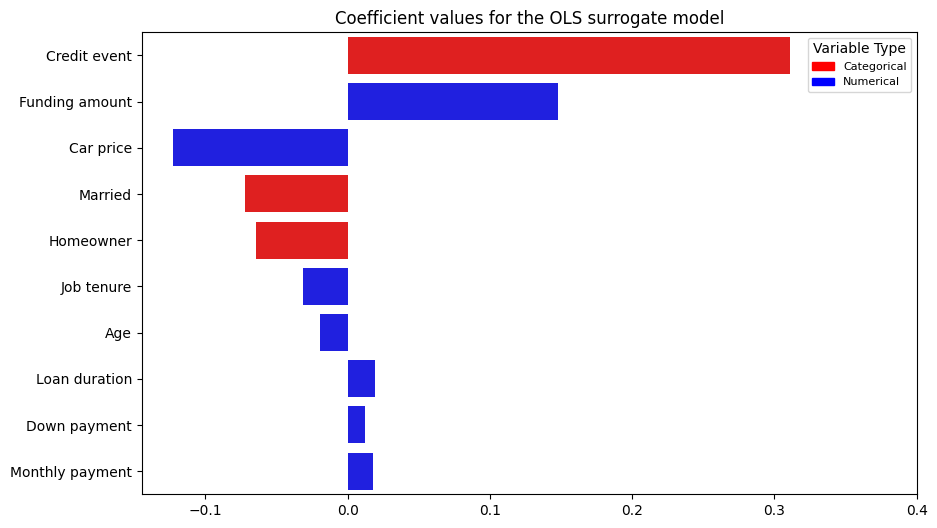

In [14]:
# Retrieve the coefficient values and feature names
coefficients = pipeline.named_steps['regression'].coef_
features = continuous_features + categorical_features

# Colorize the categorical features in red, numerical ones in blue
colors = ['blue' for i in continuous_features] + ['red' for i in categorical_features]

# Plot the coefficient values for each feature
plt.figure(figsize=(10, 6))

features_and_coeff = zip(features,coefficients,colors)
features_and_coeff_ranked = sorted(features_and_coeff, key=lambda x: abs(x[1]),reverse=True)
ranked_features, ranked_coefficients, ranked_colors = zip(*features_and_coeff_ranked)

sns.barplot(x=ranked_coefficients, y=ranked_features, palette=ranked_colors, errorbar=None, legend=False)
plt.title("Coefficient values for the OLS surrogate model")
plt.xticks([-0.1,0.0,0.1,0.2,0.3,0.4])

# Add colors to legend
red_patch = mpatches.Patch(color='red', label='Categorical')
blue_patch = mpatches.Patch(color='blue', label='Numerical')
plt.legend(handles=[red_patch, blue_patch], title='Variable Type',fontsize=8)

# Display the plot
plt.show()

## Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
data = pd.read_excel('../dataproject2024.xlsx')
data.head()

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0


In [17]:
# We are going to fit a classifier on the y_hat predicted by the black box model
y = data['Pred_default (y_hat)']

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(data, y)


# Scale continuous variables to have a meaningful comparison of the coefficients
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Down payment', 'Loan duration','Monthly payment']
categorical_features = ['Down payment', 'Credit event', 'Married', 'Homeowner']

model = LogisticRegression(penalty='l2')

# Scale continuous features, include categorical features, drop the remaining columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), continuous_features),
    ('cat','passthrough',categorical_features)
],
remainder='drop')

# Fit a linear regression with 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        
    ('log_regression', model)    
])

# Split data between test and train
X_train, X_test, y_train, y_test = train_test_split(data,y)

# Fit the regressor
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"""Our model has:
      - an accuracy on the test set of {accuracy} 
      - a balanced accuracy of {balanced_accuracy}
      - an auc of {auc}""")

Our model has:
      - an accuracy on the test set of 0.8977395048439182 
      - a balanced accuracy of 0.6285243067027908
      - an auc of 0.6285243067027908


/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_7951/2613397079.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranked_coefficients, y=ranked_features, palette=ranked_colors, errorbar=None, legend=False)


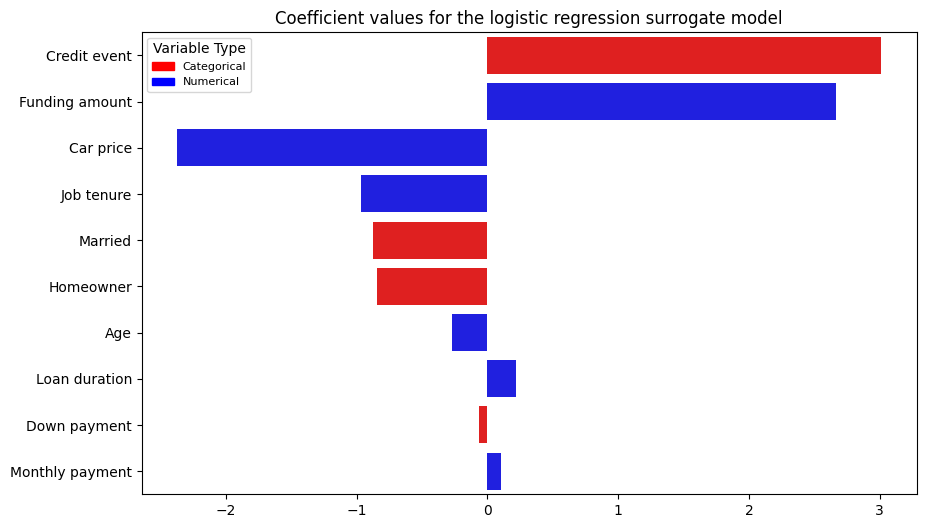

In [18]:
# Retrieve the coefficient values and feature names
coefficients = pipeline.named_steps['log_regression'].coef_.ravel() 
features = continuous_features + categorical_features

# Colorize the categorical features in red, numerical ones in blue
colors = ['blue' for i in continuous_features] + ['red' for i in categorical_features]

# Plot the coefficient values for each feature
plt.figure(figsize=(10, 6))

features_and_coeff = zip(features,coefficients,colors)
features_and_coeff_ranked = sorted(features_and_coeff, key=lambda x: abs(x[1]),reverse=True)
ranked_features, ranked_coefficients, ranked_colors = zip(*features_and_coeff_ranked)

sns.barplot(x=ranked_coefficients, y=ranked_features, palette=ranked_colors, errorbar=None, legend=False)
plt.title("Coefficient values for the logistic regression surrogate model")

# Add colors to legend
red_patch = mpatches.Patch(color='red', label='Categorical')
blue_patch = mpatches.Patch(color='blue', label='Numerical')
plt.legend(handles=[red_patch, blue_patch], title='Variable Type',fontsize=8)

# Display the plot
plt.show()